\section*{Problem 1}

Consider a decision problem defined by a two-dimensional act space ($a_1$, $a_2$) and a three dimensional consequence space ($X_1$, $X_2$, $X_3$). The decision maker would like to minimize $X_1$, maximize $X_2$, and minimize $X_3$. The mapping between the act space and the consequence space is as follows:

\begin{equation}\notag
\ X_1 = a_1^2 + 2 sin(\pi a_2)
\end{equation}
\begin{equation}\notag
\ X_2 = a_1 a_2 -10
\end{equation}
\begin{equation}\notag
\ X_3 = 5a_1^3 - a_1 a_2^2
\end{equation}

\subsection*{solution}

In [335]:
import numpy as np
import matplotlib.pyplot as plt

# define act space
act = np.matrix([[1,0],[0,1],[1,1],[2,1]])

# define functions for 
def X1(a1,a2):
    return a1**2 + 2*np.sin(np.pi*a2)

def X2(a1,a2):
    return a1*a2-10

def X3(a1,a2):
    return 5*a1**3 - a1*a2**2

X1_results = np.zeros(4)
X2_results = np.zeros(4)
X3_results = np.zeros(4)

for i in range(4):
    X1_results[i] = X1(act[i,0],act[i,1])
    X2_results[i] = X2(act[i,0],act[i,1])
    X3_results[i] = X3(act[i,0],act[i,1])
    
print('X1 per act: ', X1_results)
print('X2 per act: ', X2_results)
print('X3 per act: ', X3_results)

X1 per act:  [1.0000000e+00 2.4492936e-16 1.0000000e+00 4.0000000e+00]
X2 per act:  [-10. -10.  -9.  -8.]
X3 per act:  [ 5.  0.  4. 38.]


The results from the code above can be summarized in the following plots.  Because the consequence space is relatively few in dimension, slices of the resultant space can be visualized in this method.

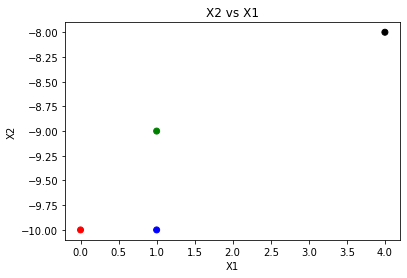

In [336]:
colors = ['blue','red','green','black']
plt.scatter(X1_results,X2_results,c=colors)
plt.title('X2 vs X1')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

In this slice above, it can be seen that the blue point (act 1) is dominated when looking to minimize X1 and maximize X2.

\break

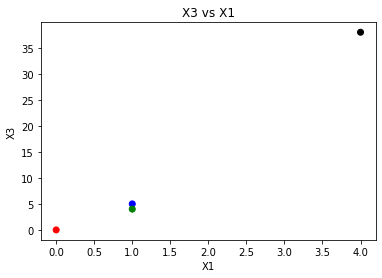

In [337]:
plt.scatter(X1_results,X3_results,c=colors)
plt.title('X3 vs X1')
plt.xlabel('X1')
plt.ylabel('X3')
plt.show()

In this slice above, it can be seen that acts 1, 3, and 4 are dominated by act 2 when looking to minimize X1 and minimize X3.

\break

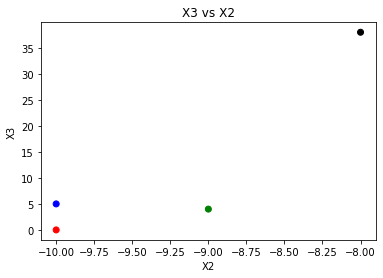

In [338]:
plt.scatter(X2_results,X3_results,c=colors)
plt.title('X3 vs X2')
plt.xlabel('X2')
plt.ylabel('X3')
plt.show()

In this slice above, it can be seen that the blue point (act 1) is dominated when looking to minimize X3 and maximize X2.

\subsubsection*{Summary:  All of this data provides the conclusion that act 1 is dominated in all three consequence spaces and can be eliminated as a logical design}

\break

\section*{Problem 2}

For the following: 
    
\begin{equation}\notag
\ X_1 = a_1
\end{equation}
\begin{equation}\notag
\ X_2 = a_2
\end{equation}
\begin{equation}\notag
\ s.t.:\  a_1^2 + a_2^2 \leq 1
\end{equation}
\begin{equation}\notag
\ (a_1 - 1)^2 + (a_2-1)^2 \leq 1
\end{equation}

Plot the feasible region (where the constraints are satisfied). Identify the Pareto-optimal set when:
\begin{enumerate}
\item both X1 and X2 are minimized
\item X1 is minimized and X2 is maximized
\item X1 is maximized and X2 is minimized
\item both X1 and X2 are maximized.
\end{enumerate}

\subsection*{Solution}

Because the consequence space maps directly to the act space, the plots for the two will look identical.  Following the two constraints on the act space, the following equations can be derived and plotted in the following python code:

\begin{equation}\notag
\ X_2 \leq \sqrt{1 - X_1^2}
\end{equation}
\begin{equation}\notag
\ X_2 \geq 1 - \sqrt{1-(X_1 - 1)^2}
\end{equation}

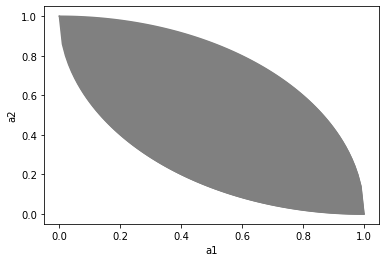

In [339]:
# define functions to plot in 2D space
def X2_1(X1):
    return np.sqrt(1-X1**2)

def X2_2(X1):
    return 1 - np.sqrt(1-(X1-1)**2)

# initialize arrays, sample functions for plotting
X1       = np.linspace(0,1,101)
X2_upper = np.zeros(len(X1))
X2_lower = np.zeros(len(X1))

for i in range(len(X2_lower)):
    X2_upper[i] = X2_1(X1[i])
    X2_lower[i] = X2_2(X1[i])
    
plt.plot(X1,X2_upper, color='gray')
plt.plot(X1,X2_lower, color='gray')
plt.fill_between(X1,X2_lower,X2_upper,color='gray')
plt.xlabel('a1')
plt.ylabel('a2')
plt.show()

For the four cases posed in the problem, see the following responses:

\begin{enumerate}
\item To minimize both $X_1$ and $X_2$, it can be seen that the bottom edge of the shaded area will represent the pareto frontier.  This means that all solutions from $(a_1 - 1)^2 + (a_2-1)^2 = 1$ will form the pareto curve.
\item To minimize $X_1$ and maximize $X_2$, it can be seen that there is a single valid point in the top left corner of the shaded region that dominates all other solutions at $a_1 = 0$, $a_2 = 1$
\item To maximize $X_1$ and minimize $X_2$, it can be seen that there is a single valid point in the bottom right corner of the shaded region that dominates all other solutions at $a_1 = 1$, $a_2 = 0$
\item To maximize both $X_1$ and $X_2$, it can be seen that the top edge of the shaded area will represent the pareto frontier.  This means that all solutions from $a_1^2 + a_2^2 = 1$ will create the set of non-dominated solutions
\end{enumerate}

\break

\section*{Problem 3}

For a decision problem with two consequences ($X_1$,$X_2$) and two actions ($a_1$,$a_2$):

\begin{equation}\notag
\ X_1(a_1,a_2) = a_1^2 + a_2^2
\end{equation}
\begin{equation}\notag
\ X_2(a_1,a_2) = 5 + a_2^2 - a_1
\end{equation}
\begin{equation}\notag
\ s.t.\ -5 \leq a_1,\ a_2 \leq 5
\end{equation}

\subsection*{Part 1}

Determine the optimal actions ($a_1$, $a_2$) if the value function is $V_1(X_1,\ X_2) = (100 − X_1 − X_2)$.

\subsubsection*{Solution:}

By plugging in the values of a1 and a2, we can see the following relationship:

\begin{equation}\notag
\ V_1(a_1, a_2) = 100 - (a_1^2 + a_2^2) - (5 + a_2^2 - a_1)
\end{equation}
\begin{equation}\notag
\ V_1(a_1, a_2) = 100 - a_1^2 - 2a_2^2 - 5 + a_1
\end{equation}

This will yield the following system of equations to find the optimal solution:

\begin{equation}\notag
\ \frac{\partial V_1}{\partial a_1} = -2a_1 + 1 = 0
\end{equation}
\begin{equation}\notag
\ \frac{\partial V_1}{\partial a_2} = -4a_2 = 0
\end{equation}

And the solution is that the optimal values in the act space are:

\begin{equation}\notag
\ a_1 = \frac{1}{2}
\end{equation}
\begin{equation}\notag
\ a_2 = 0
\end{equation}

\subsection*{Part 2}

Plot the indifference curves for the value function $V_1(X_1,\ X_2) = (100 − X_1 − X_2)$.

\subsubsection*{Solution:}

Because the value function can be viewed as a single output with 2 dimensions of inputs, a contour plot as shown below will communicate the curves of indifference as they all represent the same value to the decision maker.

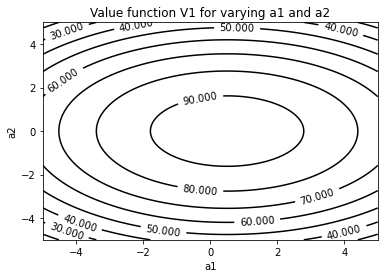

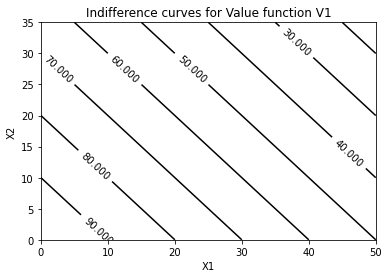

In [340]:
# define functions from problem statement
def X1(a1,a2):
    return a1**2 + a2**2

def X2(a1,a2):
    return 5 + a2**2 - a1
    
def V1(X1,X2):
    return 100-X1-X2

# initialize arrays, solve for V1
a1      = np.linspace(-5,5,101)
a2      = np.linspace(-5,5,101)
xx, yy  = np.meshgrid(a1, a2)
V       = V1(X1(xx,yy),X2(xx,yy))
        
# plot contour of the Value function
CS = plt.contour(a1,a2,V, [20,30,40,50,60,70,80,90],colors='k')
plt.xlabel('a1')
plt.ylabel('a2')
plt.clabel(CS)
plt.title('Value function V1 for varying a1 and a2')
plt.show()

# the min/max for X1 is 0/50
# the min/max for X2 is 0/35

# initialize arrays, solve for V1
X1_soln = np.linspace(0,50,101)
X2_soln = np.linspace(0,35,101)
xx, yy  = np.meshgrid(X1_soln, X2_soln)
V       = V1(xx,yy)
        
# plot contour of the Value function
CS = plt.contour(X1_soln,X2_soln,V, [20,30,40,50,60,70,80,90],colors='k')
plt.xlabel('X1')
plt.ylabel('X2')
plt.clabel(CS)
plt.title('Indifference curves for Value function V1')
plt.show()

\subsection*{Part 3}

Does the optimal action change if the value function changes to $V_2(X_1,\ X_2) = (100 − X_1^2 − X_2^2)$? Illustrate using indifference curves.

\subsubsection*{Solution:}  

Yes, the optimal point and behavior of the indifference lines change drastically.  The addition of the squared $X_1$ and $X_2$ terms cause the value to drop rapidly when not placed near the optimum.  Additionally, the change in Value function now creates non-linear Indifference curves.  This will greatly change the trade offs generated in the consequence space.

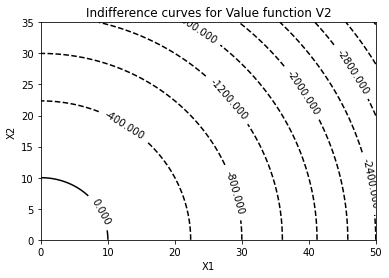

In [341]:
def V2(X1,X2):
    return 100 -X1**2 -X2**2

# initialize arrays, solve for V1
X1_soln = np.linspace(0,50,101)
X2_soln = np.linspace(0,35,101)
xx, yy  = np.meshgrid(X1_soln, X2_soln, sparse=True)
V       = V2(xx,yy)
        
# plot contour of the Value function
CS = plt.contour(X1_soln,X2_soln,V, 10,colors='k')
plt.xlabel('X1')
plt.ylabel('X2')
plt.clabel(CS)
plt.title('Indifference curves for Value function V2')
plt.show()

\subsection*{Part 4}
Calculate the marginal rate of substitution of $X_2$ at ($a_1$, $a_2$) = (−2, 3) using $V_1$ and $V_2$.

\subsubsection*{Solution:} 

The marginal rate of substitution is found by evaluating the partial derivitaves of the value function at the specified location.  From above the partial derivitaves of $V_1$ are:

\begin{equation}\notag
\ V_1(X_1, X_2) = 100 - X_1 - X_2
\end{equation}
\begin{equation}\notag
\ \frac{\partial V_1}{\partial X_1} = -1
\end{equation}
\begin{equation}\notag
\ \frac{\partial V_1}{\partial X_2} = -1
\end{equation}

This form will allow us to equate and evaluate the following for $V_1$:

\begin{equation}\notag
\ \lambda_{V_1} = \frac{\Delta X_2}{\Delta X_1} = \frac{-1}{-1} = 1
\end{equation}

The same derivation can be completed for $V_2$:

\begin{equation}\notag
\ V_2(X_1, X_2) = 100 - X_1^2 - X_2^2
\end{equation}
\begin{equation}\notag
\ \frac{\partial V_2}{\partial X_1} = -2X_1
\end{equation}
\begin{equation}\notag
\ \frac{\partial V_2}{\partial X_2} = -2X_2
\end{equation}
\begin{equation}\notag
\ \lambda_{V_2} = \frac{\Delta X_2}{\Delta X_1} = \frac{-2X_1}{-2X_2} = \frac{-2(5+(3)^2-(-2))}{-2((-2)^2+(3)^2)} = \frac{-32}{-26} \approx 1.23
\end{equation}

\break

\section*{Problem 4}

Consider the two-objective optimization problem:

\begin{equation}\notag
\ min\ f_1(x) = 2x_1x_2
\end{equation}
\begin{equation}\notag
\ min\ f_2(x) = x_1^2+x_2^2
\end{equation}

\subsection*{Part 1}
Using the weight vector w = ${ \{w_1 , (1 − w)_1 \} }^T$ , find the Pareto-optimal solutions in terms of $w_1$.

\subsubsection*{Solution:}  
The weight function is applied to the terms for $f_1$ and $f_2$ and summed to create a Value function.

\begin{equation}\notag
\ V(f_1,f_2) = w_1f_1 + (1-w_1)f_2
\end{equation}
\begin{equation}\notag
\ V(f_1,f_2) = w_1(2x_1x_2) + (1-w_1)(x_1^2+x_2^2)
\end{equation}

The partial derivitaves of the value function can be taken to find the true ideal value.

\begin{equation}\notag
\ \frac{\partial V}{\partial x_1} = 2w_1x_2 + (1-w_1)(2x_1) = 0
\end{equation}
\begin{equation}\notag
\ \frac{\partial V}{\partial x_2} = 2w_1x_1 + (1-w_1)(2x_2) = 0
\end{equation}

The above equation shows that critical points exist at (0,0), except for when $w_1 = .5$ where infinitely many solutions exist.  Three plots are created below to demonstrate the importance of weighting on the final solution of the value function.
\begin{itemize}
\item If $f_1$ is given the most weight, the indifference curves take the form of a saddle point around zero.  This will cause no true minimum to exist as the value approaches negative infinity at the top left and bottom right corners of the plot.
\item If $f_1$ and $f_2$ have equal weights, there is an ideal value where $X_2$ and $X_1$ create a linear combination to find V 
\item If $f_2$ is given the most weight, there exists one true optimal value and the indifference curves take a circular shape with the minimum at (0,0)
\end{itemize}

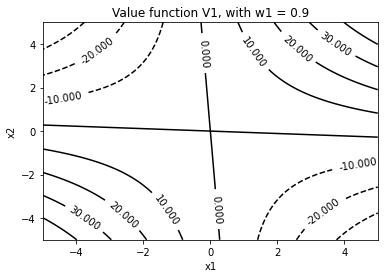

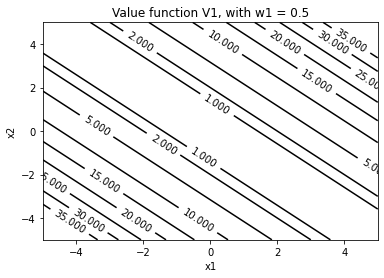

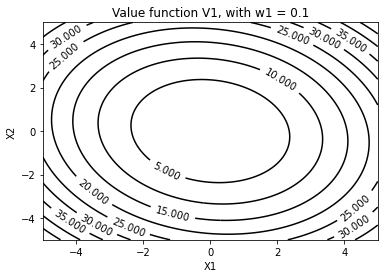

In [342]:
# define functions from problem statement
def f1(x1,x2):
    return 2.*x1*x2

def f2(x1,x2):
    return x1**2 + x2**2
    
def V1(f1,f2,w1):
    return w1*f1 + (1.-w1)*f2

# let w1 = .9 for first iteration (f1 more important)
w1 = .9

# initialize arrays, solve for V1
x1      = np.linspace(-5,5,101)
x2      = np.linspace(-5,5,101)
xx, yy  = np.meshgrid(x1, x2)
V       = V1(f1(xx,yy),f2(xx,yy),w1)
        
# plot contour of the Value function
CS = plt.contour(x1,x2,V,10,colors='k')
plt.xlabel('x1')
plt.ylabel('x2')
plt.clabel(CS)
plt.title('Value function V1, with w1 = 0.9')
plt.show()

del w1,x1,x2,V

# let w1 = .5 for first iteration (equal weight)
w1 = .5

# initialize arrays, solve for V1
x1      = np.linspace(-5,5,101)
x2      = np.linspace(-5,5,101)
xx, yy  = np.meshgrid(x1, x2)
V       = V1(f1(xx,yy),f2(xx,yy),w1)
        
# plot contour of the Value function
CS = plt.contour(x1,x2,V,[1,2,5,10,15,20,25,30,35],colors='k')
plt.xlabel('x1')
plt.ylabel('x2')
plt.clabel(CS)
plt.title('Value function V1, with w1 = 0.5')
plt.show()

del w1,x1,x2,V

# let w1 = .1 for first iteration (f1 less important)
w1 = .1

# initialize arrays, solve for V1
x1      = np.linspace(-5,5,101)
x2      = np.linspace(-5,5,101)
xx, yy  = np.meshgrid(x1, x2)
V       = V1(f1(xx,yy),f2(xx,yy),w1)
        
# plot contour of the Value function
CS = plt.contour(x1,x2,V,10,colors='k')
plt.xlabel('X1')
plt.ylabel('X2')
plt.clabel(CS)
plt.title('Value function V1, with w1 = 0.1')
plt.show()

\subsection*{Part 2}

Does the uniform set of w vectors produce a uniformly distributed set of Pareto-optimal solutions?
Explain.

\subsubsection*{Solution:}

No, the set of W vectors do not create a uniformly distributed set of Pareto-optimal solutions.  As the value of w grows, the form of the optimal solutions changes from input values at negative infinity, to $X_1 = X_2$, to a single value.

\subsection*{Part 3}

What is the relationship between $f_1$ and $f_2$ for the Pareto-optimal solutions?

\subsubsection*{Solution:}

For all cases where $w_1 \leq .5$, it can be seen that the Pareto optimal solutions yield the equation $f_1 + f_2 = 0$.  For the $w_1 = .5$ case where $X_1 = -X_2$, the value function will always yield a value of zero which is the minimum of its form.  For the $w_1 < .5$ case, the minimum of the value function will always exist at (0,0), which yields the same relationship for $f_1$ and $f_2$.

\subsection*{Part 4}

What weight vector will produce ($f_1$, $f_2$) = (−2, 3) as the optimal solution?

\subsubsection*{Solution:}

Based on the forms discussed above, no weighting is able to provide (-2,3) as the optimal solution.  To be a true optimal, $f_1 + f_2 =0$.  

\break

\section*{Problem 5}
Consider an airplane selection problem with three alternatives (Airplanes A, B, and C).  Use lexicographic orderingwith the following aspiration levels to determine the best airplane:
\begin{itemize}
\item Safety: 0.9
\item Cost: 17M
\item Range: 1700
\item Speed: 400
\item Payload: 25,000
\item Reliability: .95
\end{itemize}

\subsubsection*{Solution:}  

Based on Lexicographic ordering, we will systematically remove alternatives that do not meet the aspiration levels of the final product.  In this problem, the order of evaluation is reflected by the order of the table.  Immediately Airplane C is removed from contention as it does not meet the Safety aspiration level.  Next, Airplane A is eliminated when evaluated for range.

This means that the order of preference of our alternatives are Airplane B > Airplane A > Airplane C.

\break

\section*{Problem 6}

Consider a normally distributed random variable x with mean of 2.0 and standard deviation of 0.5. Calculate the expected values E[u(x)] of the following functions.

\subsection*{Part 1}
$u_1(x) = x$

\subsubsection*{Solution:}

\begin{equation}\notag
\ E(x) = \int_{- \infty}^{\infty} g(x) \,f(x) \,dx
\end{equation}

Where $g(x)$ is the given function and $f(x)$ is the probability distribution function:

\begin{equation}\notag
\ f(x) = \frac{1}{\sigma \sqrt{2 \pi}} e^{-\frac{1}{2} (\frac{x - \mu}{\sigma})^2}
\end{equation}

Which gives the following for Part a:

\begin{equation}\notag
\ E(x) = \int_{- \infty}^{\infty} x \frac{1}{\sigma \sqrt{2 \pi}} e^{-\frac{1}{2} (\frac{x - \mu}{\sigma})^2} \,dx
\end{equation}

In place of using integration by parts, the following code using the scipy library will be utilized for integration:

In [343]:
import scipy.integrate as integrate
from scipy.integrate import quad

sigma = .5
mu    = 2.

def f(x):
    return x*1./(sigma*(2*np.pi)**.5)*np.exp(-.5*((x-mu)/sigma)**2)

answer = quad(f,-np.inf, np.inf)

print('Expected value of part a: %.2f'%answer[0])

Expected value of part a: 2.00


\break

\subsection*{Part 2}

\begin{equation}\notag
\ E(x) = \int_{- \infty}^{\infty} x^2 \frac{1}{\sigma \sqrt{2 \pi}} e^{-\frac{1}{2} (\frac{x - \mu}{\sigma})^2} \,dx
\end{equation}

In [344]:
def f(x):
    return x**2*1./(sigma*(2*np.pi)**.5)*np.exp(-.5*((x-mu)/sigma)**2)

answer = quad(f,-np.inf, np.inf)

print('Expected value of part b: %.2f'%answer[0])

Expected value of part b: 4.25


\subsection*{Part 3}

\begin{equation}\notag
\ E(x) = \int_{1}^{3} (5+2x-x^2) \frac{1}{\sigma \sqrt{2 \pi}} e^{-\frac{1}{2} (\frac{x - \mu}{\sigma})^2} \,dx
\end{equation}

In [345]:
def f(x):
    return (5+2*x-x**2)*1./(sigma*(2*np.pi)**.5)*np.exp(-.5*((x-mu)/sigma)**2)

answer = quad(f,1,3)

print('Expected value of part c: %.2f'%answer[0])

Expected value of part c: 4.59


\subsection*{Part 4}

\begin{equation}\notag
\ E(x) = \int_{0}^{3} (2-0.1e^x) \frac{1}{\sigma \sqrt{2 \pi}} e^{-\frac{1}{2} (\frac{x - \mu}{\sigma})^2} \,dx
\end{equation}

In [346]:
def f(x):
    return (2-.1*np.exp(x))*1./(sigma*(2*np.pi)**.5)*np.exp(-.5*((x-mu)/sigma)**2)

answer = quad(f,1,3)

print('Expected value of part d: %.2f'%answer[0])

Expected value of part d: 1.13
